# Data Analysis and Data Science
## Import Libraries

<hr style="border:1px solid black"> </hr>


In [103]:
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [104]:
sns.set_theme(context="notebook", style="white", palette="Set2", rc={"figure.figsize": (9, 4)})

## Import Dataset

In [105]:
data = pd.read_csv("../data/Sepsis_Cases.csv", sep=",", header=0, index_col=0)
key_columns = ["case:concept:name", "concept:name", "time:timestamp"]

# data = pd.read_csv("../data/BPI_Challenge_2013.csv", sep=",", header=0, index_col=0)
# key_columns=['case:concept:name', 'lifecycle:transition', 'time:timestamp']

# data = pd.read_csv("../data/Helpdesk.csv", sep=",", header=0)
# key_columns=['Case ID', 'Activity', 'Complete Timestamp']

# Check data format

In [106]:
print(data.shape)
print(data.columns)
print(data.dtypes)

(15214, 32)
Index(['InfectionSuspected', 'org:group', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'concept:name', 'Age', 'DiagnosticIC',
       'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'time:timestamp', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos',
       'Oligurie', 'DiagnosticLacticAcid', 'lifecycle:transition', 'Diagnose',
       'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG',
       'case:concept:name', 'Leucocytes', 'CRP', 'LacticAcid'],
      dtype='object')
InfectionSuspected            object
org:group                     object
DiagnosticBlood               object
DisfuncOrg                    object
SIRSCritTachypnea             object
Hypotensie                    object
SIRSCritHeartRate             object
Infusion                      object
DiagnosticArtAstrup           obj

In [107]:
data["case:concept:name"].nunique()
data["concept:name"].nunique()

16

In [108]:
data.head()

,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case:concept:name,Leucocytes,CRP,LacticAcid
3833,True,A,True,False,False,False,True,True,False,ER Registration,...,True,complete,C,False,True,True,XJ,NaN,NaN,NaN
3834,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,NaN,complete,NaN,NaN,NaN,NaN,XJ,NaN,NaN,NaN
3835,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Sepsis Triage,...,NaN,complete,NaN,NaN,NaN,NaN,XJ,NaN,NaN,NaN
3836,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,NaN,complete,NaN,NaN,NaN,NaN,XJ,NaN,NaN,1.4
3837,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,XJ,296.2,NaN,NaN


In [109]:
data_test = data.copy()
data_test = data_test[key_columns]
data_test.columns = ["case", "activity", "timestamp"]
print(data.shape)
print(data_test.shape)
data_test.head(20)

(15214, 32)
(15214, 3)


,case,activity,timestamp
3833,XJ,ER Registration,2013-11-07 08:18:29+00:00
3834,XJ,ER Triage,2013-11-07 08:29:18+00:00
3835,XJ,ER Sepsis Triage,2013-11-07 08:37:32+00:00
3836,XJ,LacticAcid,2013-11-07 08:51:00+00:00
3837,XJ,Leucocytes,2013-11-07 08:51:00+00:00
3838,XJ,CRP,2013-11-07 08:51:00+00:00
3839,XJ,IV Liquid,2013-11-07 09:05:57+00:00
3840,XJ,IV Antibiotics,2013-11-07 10:05:58+00:00
3841,XJ,Admission NC,2013-11-07 11:11:34+00:00
3842,XJ,Leucocytes,2013-11-08 08:00:00+00:00


In [110]:
data_test[data_test["case"] == "XJ"]

,case,activity,timestamp
3833,XJ,ER Registration,2013-11-07 08:18:29+00:00
3834,XJ,ER Triage,2013-11-07 08:29:18+00:00
3835,XJ,ER Sepsis Triage,2013-11-07 08:37:32+00:00
3836,XJ,LacticAcid,2013-11-07 08:51:00+00:00
3837,XJ,Leucocytes,2013-11-07 08:51:00+00:00
3838,XJ,CRP,2013-11-07 08:51:00+00:00
3839,XJ,IV Liquid,2013-11-07 09:05:57+00:00
3840,XJ,IV Antibiotics,2013-11-07 10:05:58+00:00
3841,XJ,Admission NC,2013-11-07 11:11:34+00:00
3842,XJ,Leucocytes,2013-11-08 08:00:00+00:00


In [111]:
data_test.sort_index(ascending=True)

,case,activity,timestamp
0,A,ER Registration,2014-10-22 11:15:41+00:00
1,A,Leucocytes,2014-10-22 11:27:00+00:00
2,A,CRP,2014-10-22 11:27:00+00:00
3,A,LacticAcid,2014-10-22 11:27:00+00:00
4,A,ER Triage,2014-10-22 11:33:37+00:00
...,...,...,...
15209,KNA,CRP,2014-12-16 07:00:00+00:00
15210,KNA,Release A,2014-12-16 17:00:00+00:00
15211,LNA,ER Registration,2014-12-03 10:50:28+00:00
15212,LNA,ER Triage,2014-12-03 10:54:19+00:00


In [112]:
ACTIVITY_LIST = data_test["activity"].unique()
CASE_LIST = data_test["case"].unique()

print(ACTIVITY_LIST)
print(CASE_LIST)

['ER Registration' 'ER Triage' 'ER Sepsis Triage' 'LacticAcid'
 'Leucocytes' 'CRP' 'IV Liquid' 'IV Antibiotics' 'Admission NC'
 'Release A' 'Admission IC' 'Release B' 'Return ER' 'Release C'
 'Release D' 'Release E']
['XJ' 'I' 'WEA' ... 'CC' 'Y' 'QK']


## Distribution of activities

In [113]:
# Count the number of first occurences in the sequence per activity
first_activity_count = Counter()
for case_id in CASE_LIST:
    df_case = data_test[data_test["case"] == case_id].sort_values(by="timestamp", ascending=True)
    if df_case.empty:
        continue
    first_activity = df_case["activity"].iloc[0]
    first_activity_count[first_activity] += 1

print("First activity counts:")
for activity, count in first_activity_count.items():
    print(f"{activity}: {count}")

First activity counts:
ER Registration: 994
ER Sepsis Triage: 7
ER Triage: 6
CRP: 11
IV Liquid: 14
Leucocytes: 16
LacticAcid: 1


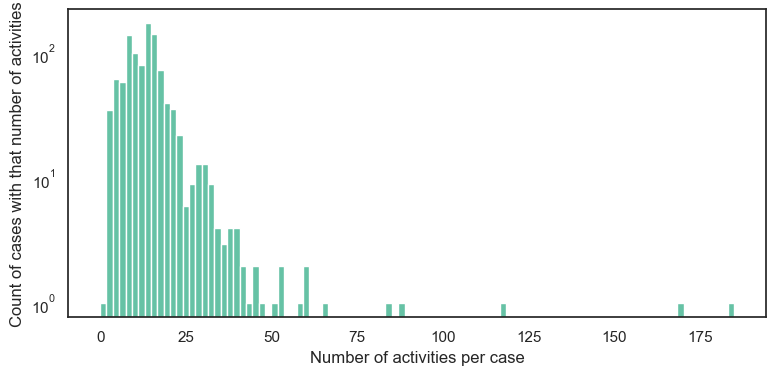

In [114]:
x = []
for case in CASE_LIST:
    # print(case)
    df_case = data_test[data_test["case"] == case]
    x.append(df_case.shape[0])

plt.hist(x, bins=100)
plt.yscale("log")
plt.xlabel("Number of activities per case")
plt.ylabel("Count of cases with that number of activities")
plt.show()

In [115]:
def next_activity_matrix(df, normalize=False):
    activity_matrix = pd.DataFrame(0, index=ACTIVITY_LIST, columns=ACTIVITY_LIST)

    for case in CASE_LIST:
        df_case = df[df["case"] == case].sort_values(by="timestamp", ascending=True)
        df_case["next_activity"] = df_case["activity"].shift(-1)

        for _, row in df_case.iterrows():
            if pd.notna(row["next_activity"]):
                activity_matrix.loc[row["activity"], row["next_activity"]] += 1

    if normalize:
        activity_matrix = activity_matrix.div(activity_matrix.sum(axis=1), axis=0)

    return activity_matrix


def plot_next_activity_heatmap_log(activity_matrix, logscale=True):
    # Log transformation (adding 1 to avoid log(0))
    log_matrix = np.log1p(activity_matrix) if logscale else activity_matrix

    plt.figure(figsize=(12, 8))
    if logscale:
        ax = sns.heatmap(
            log_matrix,
            annot=activity_matrix,
            fmt=".0f",
            cmap="Blues",
            linewidths=0.5,
            cbar_kws={"label": "Log Scale Value"},
        )
    else:
        ax = sns.heatmap(
            log_matrix,
            annot=activity_matrix,
            fmt=".2f",
            cmap="Blues",
            linewidths=0.5,
            cbar_kws={"label": "Probability"},
        )

    # Improve labels
    ax.set_xlabel("Next Activity", fontsize=14, labelpad=15)
    ax.set_ylabel("Current Activity", fontsize=14, labelpad=15)
    ax.set_title("Next Activity Transition Heatmap", fontsize=16, pad=20)

    # Rotate labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    plt.show()

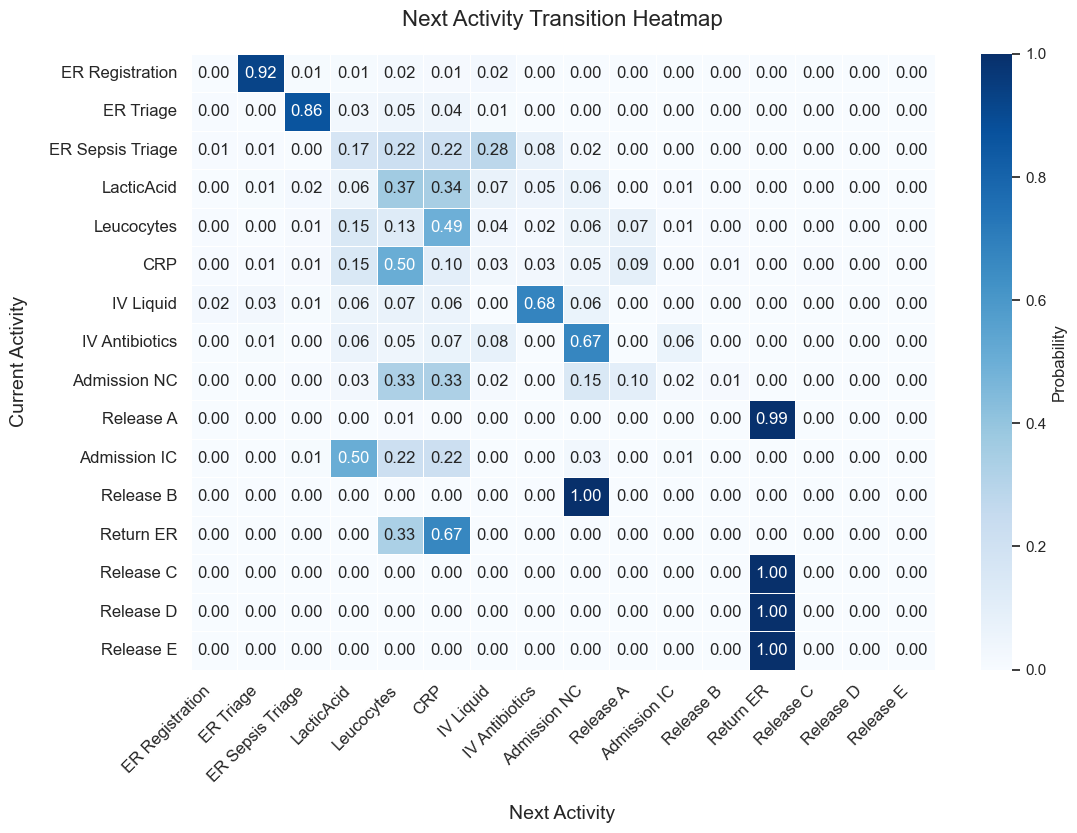

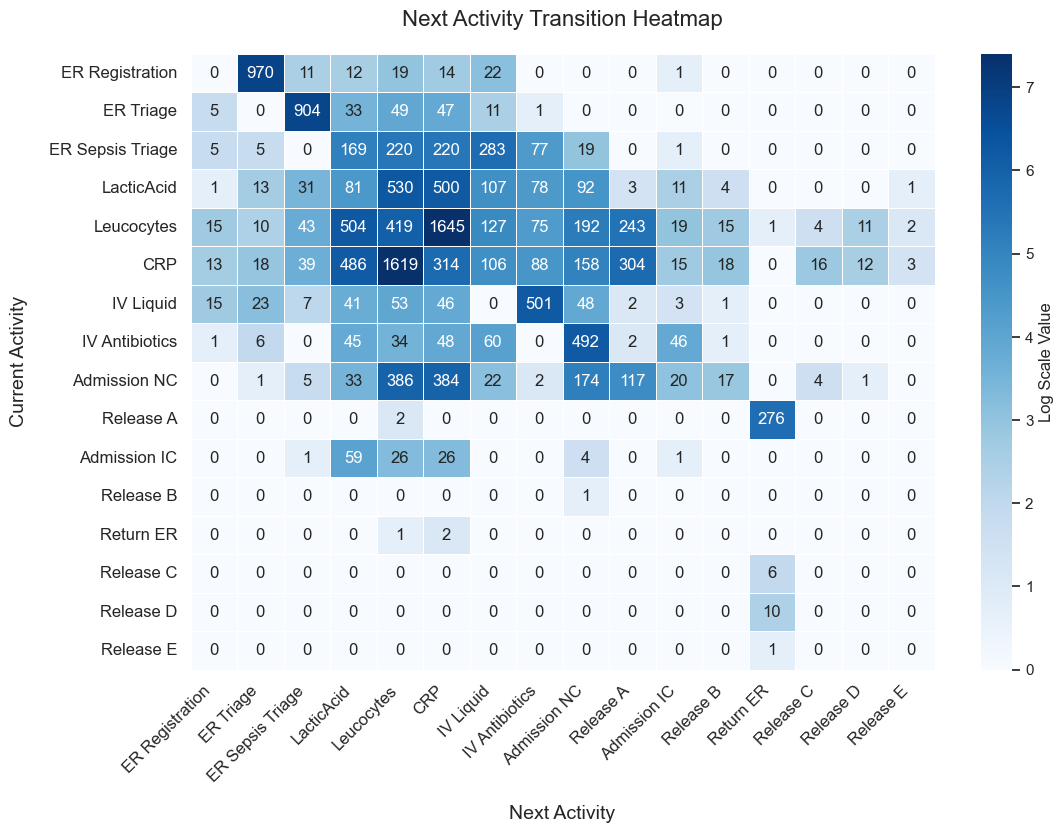

In [116]:
# Generate and plot heatmap
PROBABILITIES = True
activity_transition_matrix = next_activity_matrix(data_test, normalize=PROBABILITIES)
plot_next_activity_heatmap_log(activity_transition_matrix, logscale=not PROBABILITIES)

# Generate and plot heatmap
PROBABILITIES = False
activity_transition_matrix = next_activity_matrix(data_test, normalize=PROBABILITIES)
plot_next_activity_heatmap_log(activity_transition_matrix, logscale=not PROBABILITIES)

# Sequence analysis

In [117]:
# Extract sequences per case
grouped_by_case = data_test.groupby("case")["activity"].apply(list).tolist()


# Function to generate unique subsequences for the entire dataset (global uniqueness)
def generate_unique_subsequences(sequences):
    unique_subsequences = set()  # Store all unique subsequences across the dataset
    for sequence in sequences:
        for length in range(2, len(sequence) + 1):  # length of subsequence
            for start in range(len(sequence) - length + 1):  # start of subsequence
                unique_subsequences.add(tuple(sequence[start : start + length]))  # Add unique subsequence
    return unique_subsequences


# Generate unique subsequences for real data
unique_subsequences = generate_unique_subsequences(grouped_by_case)


# Function to generate all subsequences
def generate_subsequences(sequence):
    subsequences = []
    for length in range(2, len(sequence) + 1):  # length of subsequence
        for start in range(len(sequence) - length + 1):  # start of subsequence
            subsequences.append(tuple(sequence[start : start + length]))  # append subsequence as a tuple
    return subsequences


# Compute real subsequence length distribution
subsequence_lengths = [len(seq) for seq in unique_subsequences]

# Extract sequence lengths and activity distribution
sequence_lengths = [len(seq) for seq in grouped_by_case]

max_seq_length = max(sequence_lengths)

subsequence_counts = Counter()
for sequence in grouped_by_case:
    subsequences = generate_subsequences(sequence)
    subsequence_counts.update(subsequences)

In [118]:
# Generate Random Baseline
activity_pool = [act for seq in grouped_by_case for act in seq]
activity_distribution = Counter(activity_pool)

# Generate random sequences with the same length and activity distribution
random_sequences = []
for length in sequence_lengths:
    random_seq = random.choices(
        list(activity_distribution.keys()), weights=list(activity_distribution.values()), k=length
    )  # Sample activities
    random.shuffle(random_seq)  # Shuffle activities randomly
    random_sequences.append(random_seq)

# Ensure uniqueness computation is the same
unique_random_subsequences = generate_unique_subsequences(random_sequences)

# Compute random baseline subsequence length distribution
subsequence_lengths_random = [len(seq) for seq in unique_random_subsequences]
length_counts_random = Counter(subsequence_lengths_random)

# Convert to sorted lists for plotting the random baseline
sorted_lengths = sorted(length_counts_random.keys())
random_baseline_freqs = [length_counts_random[length] for length in sorted_lengths]

In [119]:
# Compute the distance between the two distributions
distance = scipy.stats.wasserstein_distance(subsequence_lengths, subsequence_lengths_random)
print(f"Wasserstein Distance: {distance}")

Wasserstein Distance: 6.418227561228381


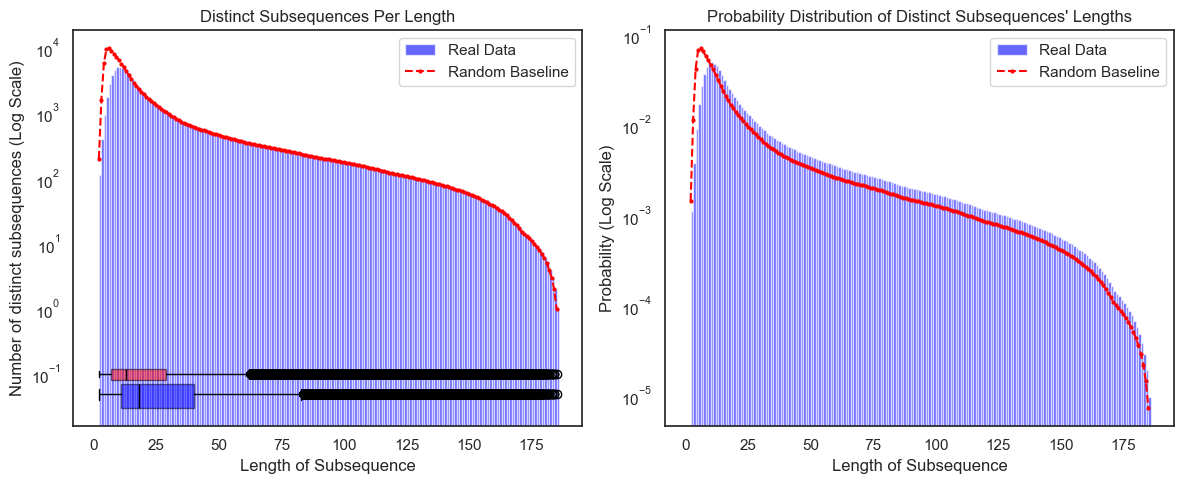

In [120]:
# Step 3: Plot Real vs Random Baseline Distribution
plt.figure(figsize=(12, 5))

# ---------------- First Plot: Raw Counts ----------------
plt.subplot(1, 2, 1)
# Real data: Histogram
plt.hist(subsequence_lengths, bins=range(1, max(subsequence_lengths) + 2), alpha=0.6, label="Real Data", color="blue")

# Random baseline: Smooth line plot
plt.plot(
    sorted_lengths,
    random_baseline_freqs,
    linestyle="--",
    marker="o",
    markersize=2,
    color="red",
    label="Random Baseline",
)

# Add Boxplots for both distributions
boxplot = plt.boxplot(
    [subsequence_lengths, subsequence_lengths_random],
    vert=False,
    positions=[0.05, 0.1],  # Adjust positions to avoid overlap
    widths=0.04,  # Make boxplots thinner
    patch_artist=True,
    medianprops={"color": "black"},
)

# Manually set colors for each box
colors = ["blue", "red"]
for patch, color in zip(boxplot["boxes"], colors, strict=False):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Make it slightly transparent

# Formatting
plt.yscale("log")
plt.xlabel("Length of Subsequence")
plt.ylabel("Number of distinct subsequences (Log Scale)")
plt.title("Distinct Subsequences Per Length")
plt.legend()

# ---------------- Second Plot: Probability Distribution ----------------
plt.subplot(1, 2, 2)
# Real data: Probability Distribution (normalized)
plt.hist(
    subsequence_lengths,
    bins=range(1, max(subsequence_lengths) + 2),
    density=True,
    alpha=0.6,
    label="Real Data",
    color="blue",
)

# Random baseline: Probability Distribution (normalized)
plt.plot(
    sorted_lengths,
    random_baseline_freqs / np.sum(random_baseline_freqs),
    linestyle="--",
    marker="o",
    markersize=2,
    color="red",
    label="Random Baseline",
)

# Formatting
plt.xlabel("Length of Subsequence")
plt.ylabel("Probability (Log Scale)")
plt.yscale("log")
plt.title("Probability Distribution of Distinct Subsequences' Lengths")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [121]:
def compute_conditional_distributions(data, max_suffix_length):
    """Computes next-activity distributions conditioned on fixed prefix lengths."""
    # Dictionary to store the next activity counts: {(last activity A, prefix length) -> counts per next activity}
    conditional_counts = {
        (a, suffix_len): dict.fromkeys(ACTIVITY_LIST, 0)
        for a in ACTIVITY_LIST
        for suffix_len in range(2, max_suffix_length + 1)
    }
    # Dictionary to store distributions: {(last activity A, prefix length) -> distribution for next activity}
    conditional_distributions = {
        (a, suffix_len): dict.fromkeys(ACTIVITY_LIST, 0.0)
        for a in ACTIVITY_LIST
        for suffix_len in range(2, max_suffix_length + 1)
    }

    # Loop over each possible suffix length
    for suffix_length in range(2, max_suffix_length + 1):
        # Loop over each case in the dataset
        for case in CASE_LIST:
            df_case = data[data["case"] == case].sort_values(by="timestamp", ascending=True)
            sequence = df_case["activity"].tolist()

            # Loop over each position in the sequence (where the prefix can be of length ''suffix_length'')
            for i in range(len(sequence) - suffix_length):
                next_act = sequence[i + suffix_length]  # Next activity after the prefix
                last_act = sequence[i + suffix_length - 1]  # Last activity in the prefix
                conditional_counts[(last_act, suffix_length)][next_act] += 1  # Increment count for the next activity

        # Normalize the distribution for each prefix
        for last_act in ACTIVITY_LIST:
            total = sum(conditional_counts[(last_act, suffix_length)].values())
            if total > 0:
                for next_act in ACTIVITY_LIST:
                    conditional_distributions[(last_act, suffix_length)][next_act] = (
                        conditional_counts[(last_act, suffix_length)][next_act] / total
                    )

    return conditional_counts, conditional_distributions

In [122]:
def compute_conditional_distributions(data: pd.DataFrame, max_suffix_length: int) -> tuple[dict, dict]:
    """Compute next-activity distributions conditioned on fixed prefix lengths."""
    # Dictionary to store the next activity counts: {(last activity A, prefix length) -> counts per next activity}
    conditional_counts = {
        (a, suffix_len): dict.fromkeys(ACTIVITY_LIST, 0)
        for a in ACTIVITY_LIST
        for suffix_len in range(2, max_suffix_length + 1)
    }
    # Dictionary to store distributions: {(last activity A, prefix length) -> distribution for next activity}
    conditional_distributions = {
        (a, suffix_len): dict.fromkeys(ACTIVITY_LIST, 0.0)
        for a in ACTIVITY_LIST
        for suffix_len in range(2, max_suffix_length + 1)
    }

    # Loop over each possible suffix length
    for suffix_length in range(2, max_suffix_length + 1):
        # Loop over each case in the dataset
        for case in CASE_LIST:
            df_case = data[data["case"] == case].sort_values(by="timestamp", ascending=True)
            sequence = df_case["activity"].tolist()

            # Loop over each position in the sequence (where the prefix can be of length ''suffix_length'')
            for i in range(len(sequence) - suffix_length):
                next_act = sequence[i + suffix_length]  # Next activity after the prefix
                last_act = sequence[i + suffix_length - 1]  # Last activity in the prefix
                conditional_counts[(last_act, suffix_length)][next_act] += 1  # Increment count for the next activity

        # Normalize the distribution for each prefix
        for last_act in ACTIVITY_LIST:
            total = sum(conditional_counts[(last_act, suffix_length)].values())
            if total > 0:
                for next_act in ACTIVITY_LIST:
                    conditional_distributions[(last_act, suffix_length)][next_act] = (
                        conditional_counts[(last_act, suffix_length)][next_act] / total
                    )

    return conditional_counts, conditional_distributions

In [123]:
def compute_distributions_per_prefix(data: pd.DataFrame, max_suffix_length: int, debug: bool) -> tuple[dict, dict]:
    """Compute next-activity distributions conditioned on actual prefixes that occur in the data."""
    # Dictionaries to store the next activity counts and distributions
    per_prefix_counts = {}
    conditional_distributions = {}

    # First pass: identify all prefixes that actually occur in the data
    for case in CASE_LIST:
        df_case = data[data["case"] == case].sort_values(by="timestamp", ascending=True)
        sequence = df_case["activity"].tolist()

        # Loop through different prefix lengths
        for prefix_length in range(1, max_suffix_length + 1):
            if debug:
                print(f"Processing case: {case}, prefix length: {prefix_length}")
            # Loop over each position where a prefix of current length ends
            for i in range(len(sequence) - prefix_length):
                # If there's a next activity after this prefix
                if i + prefix_length < len(sequence):
                    if debug:
                        print(f"  Hourra! Prefix: {sequence[i : i + prefix_length]}")
                    prefix = tuple(sequence[i : i + prefix_length])  # Extract the prefix

                    # Initialize counts dictionary for this prefix if not seen before
                    if prefix not in per_prefix_counts:
                        per_prefix_counts[prefix] = dict.fromkeys(ACTIVITY_LIST, 0)
                        conditional_distributions[prefix] = dict.fromkeys(ACTIVITY_LIST, 0.0)

    # Second pass: count occurrences of next activities after each prefix
    for case in CASE_LIST:
        df_case = data[data["case"] == case].sort_values(by="timestamp", ascending=True)
        sequence = df_case["activity"].tolist()

        # Loop through different prefix lengths
        for prefix_length in range(2, max_suffix_length + 1):
            # Loop over each position where a prefix of current length ends
            for i in range(len(sequence) - prefix_length):
                # If there's a next activity after this prefix
                if i + prefix_length < len(sequence):
                    prefix = tuple(sequence[i : i + prefix_length])  # Extract the prefix
                    next_act = sequence[i + prefix_length]  # Next activity after the prefix

                    if debug:
                        print(f"Incrementing count for prefix: {prefix}, next activity: {next_act}")
                        print(f"  Current counts: {per_prefix_counts[prefix]}")
                    per_prefix_counts[prefix][next_act] += 1  # Increment count

    # Normalize the distributions
    for prefix, counts in per_prefix_counts.items():
        total = sum(counts.values())
        if total > 0:
            for next_act in ACTIVITY_LIST:
                conditional_distributions[prefix][next_act] = counts[next_act] / total

    return per_prefix_counts, conditional_distributions

In [124]:
from matplotlib.colors import Normalize


def plot_conditional_activity_matrix(
    conditional_counts: dict, conditional_distributions: dict, suffix_length_list: list
) -> None:
    """Plot a heatmap of conditional activity distributions for each prefix length with count indicators."""
    # Check if all suffix lengths are present in both conditional_counts and conditional_distributions
    missing_suffix_lengths = [
        length
        for length in suffix_length_list
        if not any((activity, length) in conditional_counts for activity in ACTIVITY_LIST)
        or not any((activity, length) in conditional_distributions for activity in ACTIVITY_LIST)
    ]

    if missing_suffix_lengths:
        msg = f"The following suffix lengths are missing in the data: {missing_suffix_lengths}"
        raise ValueError(msg)

    num_activities = len(ACTIVITY_LIST)
    num_suffix_lengths = len(suffix_length_list)

    # Compute counts matrix for given suffix lengths
    counts_matrix = np.array(
        [
            [
                sum(conditional_counts.get((activity, suffix_length), {}).values())
                for suffix_length in suffix_length_list
            ]
            for activity in ACTIVITY_LIST
        ]
    )

    activity_idxs = {activity: idx for idx, activity in enumerate(ACTIVITY_LIST)}

    # Fill probability matrix
    matrix = np.zeros((num_activities, num_suffix_lengths, num_activities))
    for activity in ACTIVITY_LIST:
        for idx, suffix_length in enumerate(suffix_length_list):
            dist = conditional_distributions.get((activity, suffix_length), {})
            for next_activity, prob in dist.items():
                act_idx = activity_idxs[activity]
                next_act_idx = activity_idxs[next_activity]
                matrix[act_idx, idx, next_act_idx] = prob

    # Create subplots dynamically based on suffix lengths
    fig, axes = plt.subplots(
        1, num_suffix_lengths + 1, figsize=(12, 8), gridspec_kw={"width_ratios": [0.3] + [1] * num_suffix_lengths}
    )

    # Normalize count colors across all suffix lengths
    norm = Normalize(vmin=counts_matrix.min(), vmax=counts_matrix.max())
    cmap_counts = sns.color_palette("Reds", as_cmap=True)

    # Leftmost column: Count indicators
    ax_counts = axes[0]
    sns.heatmap(
        counts_matrix,
        annot=True,
        fmt="d",
        cmap=cmap_counts,
        norm=norm,
        linewidths=0.5,
        cbar=False,
        yticklabels=ACTIVITY_LIST,  # type: ignore
        xticklabels=[],
        ax=ax_counts,
        annot_kws={"size": 8, "rotation": 90},
    )  # Adjust font size & rotation
    ax_counts.set_title("Counts")

    # Probability heatmaps for selected suffix lengths
    for suffix_idx, suffix_length in enumerate(suffix_length_list):
        matrix_slice = matrix[:, suffix_idx, :]

        ax = axes[suffix_idx + 1]
        sns.heatmap(
            matrix_slice,
            annot=False,
            fmt=".2f",
            cmap="Blues",
            linewidths=0.5,
            yticklabels=[],
            xticklabels=ACTIVITY_LIST,  # type: ignore
            cbar=False,
            ax=ax,
        )

        ax.set_title(f"Suffix Length {suffix_length}")
        ax.set_xlabel("Next Activity")
        ax.set_xticks(np.arange(num_activities) + 0.5)
        ax.set_xticklabels(ACTIVITY_LIST, rotation=90, fontsize=10)

        if suffix_idx == num_suffix_lengths - 1:
            cbar = fig.colorbar(ax.collections[-1], ax=axes, orientation="vertical")
            cbar.outline.set_visible(False)  # type: ignore # Remove dark border
            cbar.ax.set_position((1.0, 0.1, 0.02, 0.8))  # Adjust height
            cbar.set_label("Probability")
            cbar.set_ticks([0, 0.5, 1], minor=True)  # Set colorbar ticks from 0 to 1

    plt.tight_layout()
    plt.show()

In [125]:
# Compute distributions
global_dist = next_activity_matrix(data_test, normalize=True)
conditional_counts, conditional_dist = compute_conditional_distributions(data_test, max_suffix_length=20)

In [126]:
print(conditional_counts)

{('ER Registration', 2): {'ER Registration': 0, 'ER Triage': 48, 'ER Sepsis Triage': 3, 'LacticAcid': 1, 'Leucocytes': 1, 'CRP': 1, 'IV Liquid': 0, 'IV Antibiotics': 0, 'Admission NC': 0, 'Release A': 0, 'Admission IC': 1, 'Release B': 0, 'Return ER': 0, 'Release C': 0, 'Release D': 0, 'Release E': 0}, ('ER Registration', 3): {'ER Registration': 0, 'ER Triage': 23, 'ER Sepsis Triage': 0, 'LacticAcid': 0, 'Leucocytes': 0, 'CRP': 1, 'IV Liquid': 0, 'IV Antibiotics': 0, 'Admission NC': 0, 'Release A': 0, 'Admission IC': 1, 'Release B': 0, 'Return ER': 0, 'Release C': 0, 'Release D': 0, 'Release E': 0}, ('ER Registration', 4): {'ER Registration': 0, 'ER Triage': 4, 'ER Sepsis Triage': 0, 'LacticAcid': 0, 'Leucocytes': 0, 'CRP': 0, 'IV Liquid': 0, 'IV Antibiotics': 0, 'Admission NC': 0, 'Release A': 0, 'Admission IC': 1, 'Release B': 0, 'Return ER': 0, 'Release C': 0, 'Release D': 0, 'Release E': 0}, ('ER Registration', 5): {'ER Registration': 0, 'ER Triage': 0, 'ER Sepsis Triage': 0, 'Lact

In [127]:
per_prefix_counts, per_prefix_dist = compute_distributions_per_prefix(data_test, max_suffix_length=20, debug=False)

In [128]:
print(per_prefix_counts[("ER Registration", "ER Triage", "ER Sepsis Triage")])
print(per_prefix_dist[("ER Registration", "ER Triage", "ER Sepsis Triage")])

{'ER Registration': 0, 'ER Triage': 0, 'ER Sepsis Triage': 0, 'LacticAcid': 163, 'Leucocytes': 214, 'CRP': 217, 'IV Liquid': 182, 'IV Antibiotics': 27, 'Admission NC': 6, 'Release A': 0, 'Admission IC': 0, 'Release B': 0, 'Return ER': 0, 'Release C': 0, 'Release D': 0, 'Release E': 0}
{'ER Registration': 0.0, 'ER Triage': 0.0, 'ER Sepsis Triage': 0.0, 'LacticAcid': 0.20148331273176762, 'Leucocytes': 0.26452410383189123, 'CRP': 0.26823238566131025, 'IV Liquid': 0.2249690976514215, 'IV Antibiotics': 0.03337453646477132, 'Admission NC': 0.007416563658838072, 'Release A': 0.0, 'Admission IC': 0.0, 'Release B': 0.0, 'Return ER': 0.0, 'Release C': 0.0, 'Release D': 0.0, 'Release E': 0.0}


/var/folders/69/dpfqds0n6f9dds88rmx8pvp40000gp/T/ipykernel_25804/2106103589.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


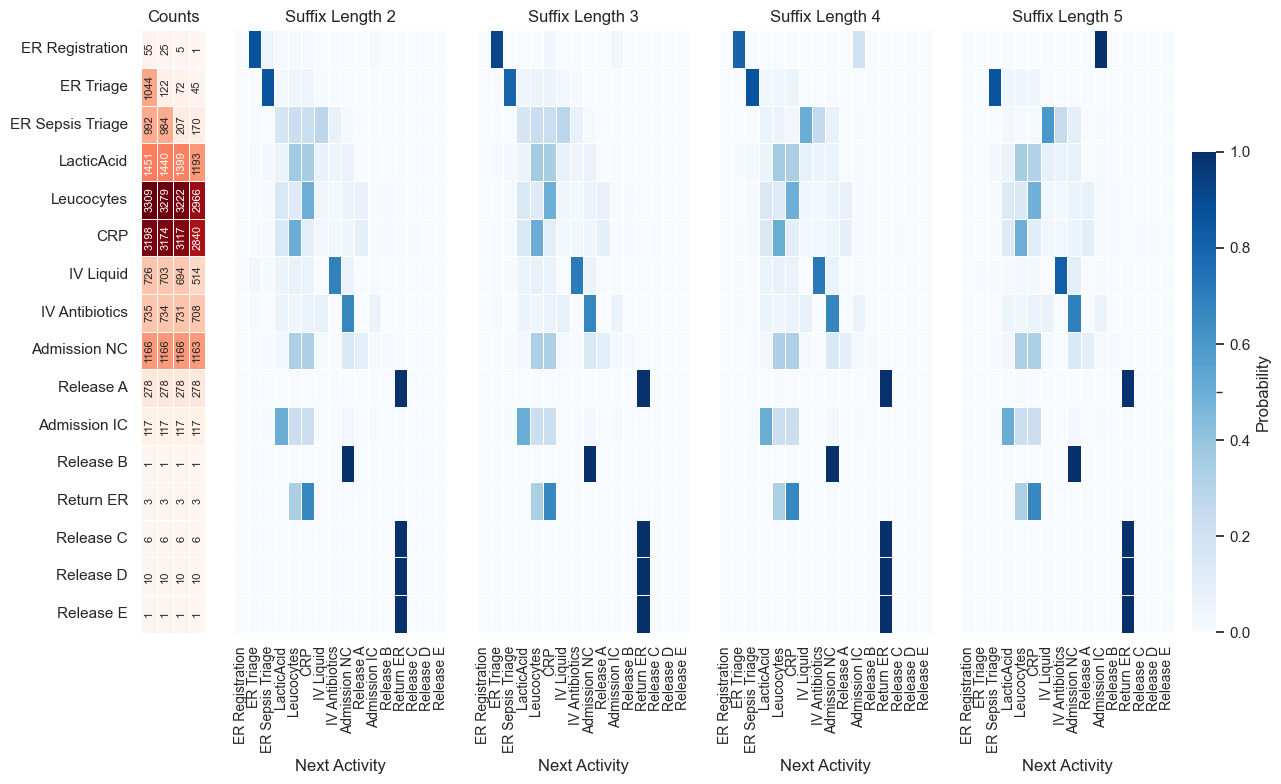

In [129]:
plot_conditional_activity_matrix(conditional_counts, conditional_dist, suffix_length_list=list(range(2, 6)))

/var/folders/69/dpfqds0n6f9dds88rmx8pvp40000gp/T/ipykernel_25804/2106103589.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


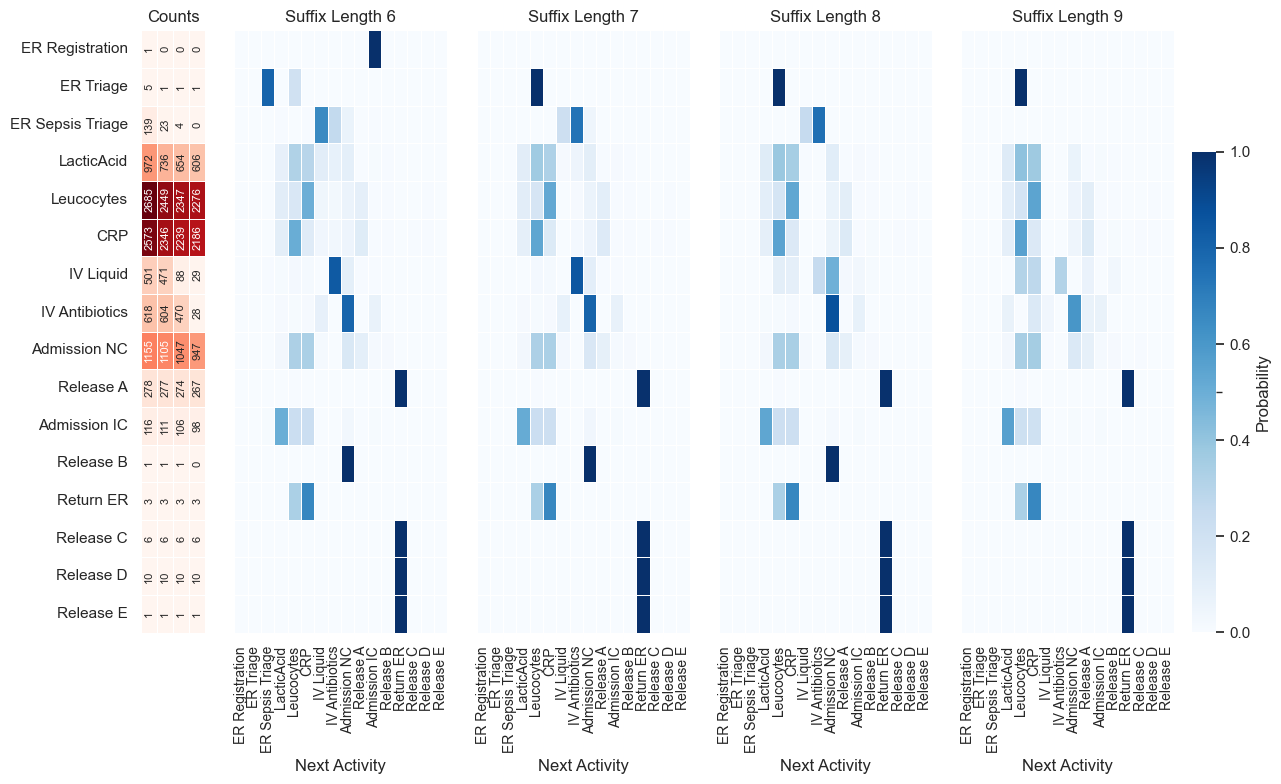

In [130]:
plot_conditional_activity_matrix(conditional_counts, conditional_dist, suffix_length_list=list(range(6, 10)))

In [184]:
from matplotlib.ticker import MaxNLocator


def compute_conditional_entropy(conditional_distributions: dict) -> dict:
    """Compute the conditional entropy for each prefix length."""
    conditional_entropy = {}
    for key, dist in conditional_distributions.items():
        entropy = -sum(prob * np.log2(prob) if prob > 0 else 0 for prob in dist.values())
        conditional_entropy[key] = max(0, entropy)
    return conditional_entropy


def plot_conditional_entropy_table(conditional_entropy: dict, suffix_length_list: list | None = None) -> None:
    """Plot the conditional entropy for each prefix length or actual prefix.

    Args:
        conditional_entropy: Dictionary of conditional entropy values.
            Can be in the format {(activity, suffix_length): entropy} or {prefix_tuple: entropy}
        suffix_length_list: List of suffix lengths to plot. Required for old-style format.
        average_per_prefix: Whether to average across all prefixes of the same length.
        conditional_counts: Dictionary of counts for each prefix. Required if using actual prefixes.

    """
    # Original implementation for format {(activity, suffix_length): entropy}
    if suffix_length_list is None:
        msg = "suffix_length_list is required for old-style format"
        raise ValueError(msg)

    entropy_values = np.array(
        [
            conditional_entropy.get((activity, suffix_length), 0)
            for activity in ACTIVITY_LIST
            for suffix_length in suffix_length_list
        ]
    ).reshape(len(ACTIVITY_LIST), -1)

    # Plot the heatmap
    _, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(
        entropy_values,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        linewidths=0.5,
        yticklabels=ACTIVITY_LIST,  # type: ignore
        xticklabels=suffix_length_list,
        cbar_kws={"label": "Entropy"},
        ax=ax,
    )
    ax.set_xlabel("Prefix Length")
    ax.set_ylabel("Last Activity")
    ax.set_title("Conditional Entropy of Next Activity Prediction")
    plt.show()


def plot_conditional_entropy_curves(
    conditional_entropy: dict, suffix_length_list: list[int], weights: dict | None = None
) -> None:
    """Plot the conditional entropy curves for each activity."""
    _, ax = plt.subplots(figsize=(12, 6))

    max_entropy = 0

    for activity in ACTIVITY_LIST:
        entropies = [conditional_entropy.get((activity, suffix_length), 0) for suffix_length in suffix_length_list]
        ax.plot(suffix_length_list, entropies, label=f"{activity}")
        max_entropy = max(max_entropy, max(entropies) if entropies else 0)

    # Set the x-axis labels to be integers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Set explicit ticks for each integer
    ax.set_xticks(
        np.arange(min(suffix_length_list), max(suffix_length_list) + 1, 1)
    )  # Replace x_data with the appropriate x values you want to display ticks for

    # Calculate weighted means if weights are provided
    if weights is not None:
        # Calculate weighted mean for each suffix length
        weighted_means = []
        for suffix_length in suffix_length_list:
            total_weight = 0
            weighted_sum = 0

            for activity in ACTIVITY_LIST:
                weight = weights.get((activity, suffix_length), 0)
                entropy = conditional_entropy.get((activity, suffix_length), 0)

                weighted_sum += entropy * weight
                total_weight += weight

            # Avoid division by zero
            if total_weight > 0:
                weighted_means.append(weighted_sum / total_weight)
            else:
                weighted_means.append(0)

        max_entropy = max(max_entropy, max(weighted_means) if weighted_means else 0)
        ax.plot(suffix_length_list, weighted_means, label="Weighted Mean", linestyle="--", color="black")

    ax.set_xlabel("Prefix Length")
    ax.set_ylabel("Conditional Entropy")
    ax.set_title("Conditional Entropy of Next Activity Prediction")
    ax.legend(title="Last Activity", bbox_to_anchor=(1, 1))
    ax.set_ylim(0, max_entropy * 1.1)  # Set y-axis limit to slightly above the maximum entropy value

    plt.show()
    # ax.set_xlabel("Prefix Length")
    # ax.set_ylabel("Last Activity")
    # ax.set_title("Conditional Entropy of Next Activity Prediction")

    # plt.tight_layout()
    # plt.show()


def plot_entropy_difference_aggregated(conditional_entropy, suffix_length_list):
    """Plot a bar per length l, split by activities showing the difference in entropy between lengths l and l+1."""
    # Initialize the figure and axis
    _, ax = plt.subplots(figsize=(12, 6))

    # Define the bar width
    bar_width = 0.8
    index = np.arange(len(suffix_length_list) - 1)  # Positions for bars corresponding to lengths l

    # Define colors for each activity (you can adjust the colormap here)
    activity_colors = plt.get_cmap("tab20", len(ACTIVITY_LIST)).colors  # type: ignore

    # Initialize a list to store the differences for each activity
    all_differences = {activity: [] for activity in ACTIVITY_LIST}

    # Loop through each length l and calculate the differences for all activities
    for activity in ACTIVITY_LIST:
        differences = [
            conditional_entropy.get((activity, l + 1), 0) - conditional_entropy.get((activity, l), 0)
            for l in suffix_length_list[:-1]
        ]
        all_differences[activity] = differences

    # Now plot the stacked bars
    for i, activity in enumerate(ACTIVITY_LIST):
        # Get the differences for this activity
        differences = all_differences[activity]

        # Stack the differences for each activity
        if i == 0:
            ax.bar(index, differences, bar_width, color=activity_colors[i], label=f"{activity}")
        else:
            ax.bar(
                index,
                differences,
                bar_width,
                bottom=np.sum([all_differences[act] for act in ACTIVITY_LIST[:i]], axis=0),
                color=activity_colors[i],
                label=f"{activity}",
            )

    # Customize the plot
    ax.set_xlabel(r"Prefix Length ($\ell$)", fontsize=14)
    ax.set_ylabel(r"Entropy Difference: $H(\ell) - H(\ell-1)$", fontsize=14)
    ax.set_title("Difference in Conditional Entropy Between Prefix Lengths (Aggregated by Activity)", fontsize=16)

    # Set the x-axis ticks and labels
    ax.set_xticks(index)
    ax.set_xticklabels(suffix_length_list[1:])  # Show l+1 values (not l)

    # Add legend
    ax.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show the plot
    plt.tight_layout()
    plt.show()

In [185]:
def compute_mean_entropy_per_prefix_length(conditional_entropy: dict, conditional_counts: dict) -> tuple[dict, dict]:
    """Compute the mean conditional entropy for each prefix length."""
    # Group prefixes by length and last activity
    grouped_entropy = {}
    prefix_counts = {}
    activity_weights = {}

    # First, organize prefixes by their length and last activity
    for prefix, entropy_value in conditional_entropy.items():
        prefix_length = len(prefix)
        last_activity = prefix[-1]

        if (last_activity, prefix_length) not in grouped_entropy:
            grouped_entropy[(last_activity, prefix_length)] = []
            prefix_counts[(last_activity, prefix_length)] = []

        # Store both the entropy and the count (for weighted average)
        grouped_entropy[(last_activity, prefix_length)].append(entropy_value)
        # Get the total count for this prefix
        total_count = sum(conditional_counts[prefix].values())
        prefix_counts[(last_activity, prefix_length)].append(total_count)

    # Calculate weighted averages
    entropy_by_length_activity = {}
    for key, entropies in grouped_entropy.items():
        counts = prefix_counts[key]
        total_weight = sum(counts)
        activity_weights[key] = total_weight

        if total_weight > 0:
            # Weighted average of entropy values
            weighted_avg = sum(e * c for e, c in zip(entropies, counts, strict=False)) / total_weight
            entropy_by_length_activity[key] = weighted_avg
        else:
            print(f"Warning: No counts for prefix {key}. Setting entropy to 0.")
            entropy_by_length_activity[key] = 0

    return entropy_by_length_activity, activity_weights

2.182760288290464


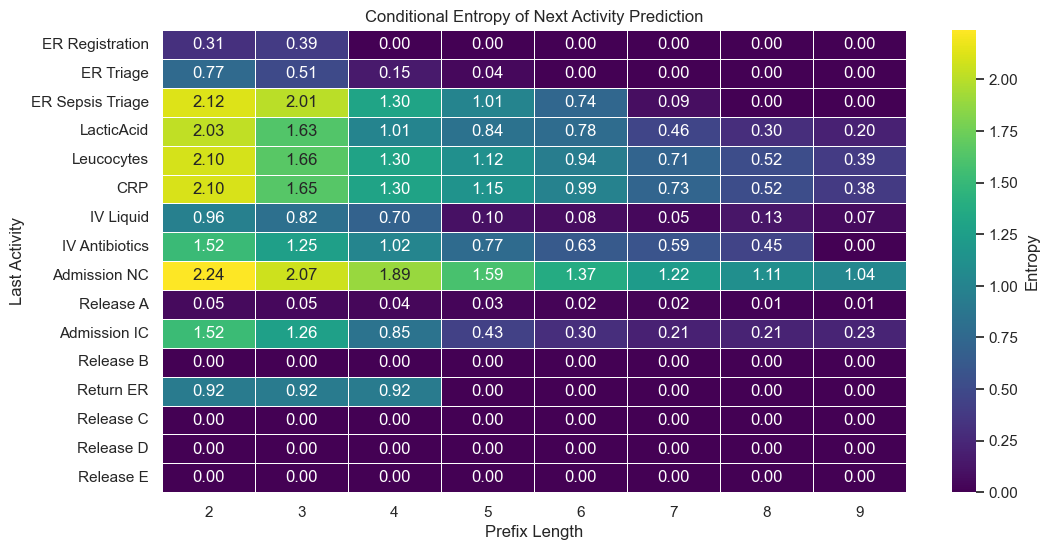

In [186]:
per_prefix_entropy = compute_conditional_entropy(per_prefix_dist)
print(per_prefix_entropy[("ER Registration", "ER Triage", "ER Sepsis Triage")])

conditional_entropy, activity_weights = compute_mean_entropy_per_prefix_length(
    per_prefix_entropy,
    conditional_counts=per_prefix_counts,
)
plot_conditional_entropy_table(conditional_entropy, suffix_length_list=list(range(2, 10)))

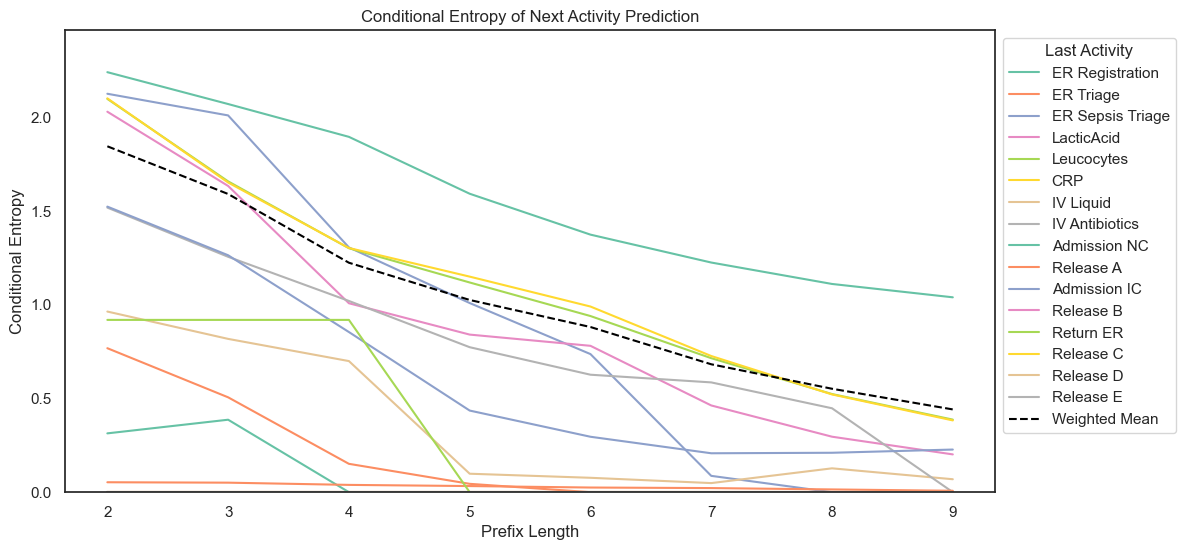

In [187]:
plot_conditional_entropy_curves(conditional_entropy, suffix_length_list=list(range(2, 10)), weights=activity_weights)

In [188]:
conditional_entropy = compute_conditional_entropy(conditional_dist)

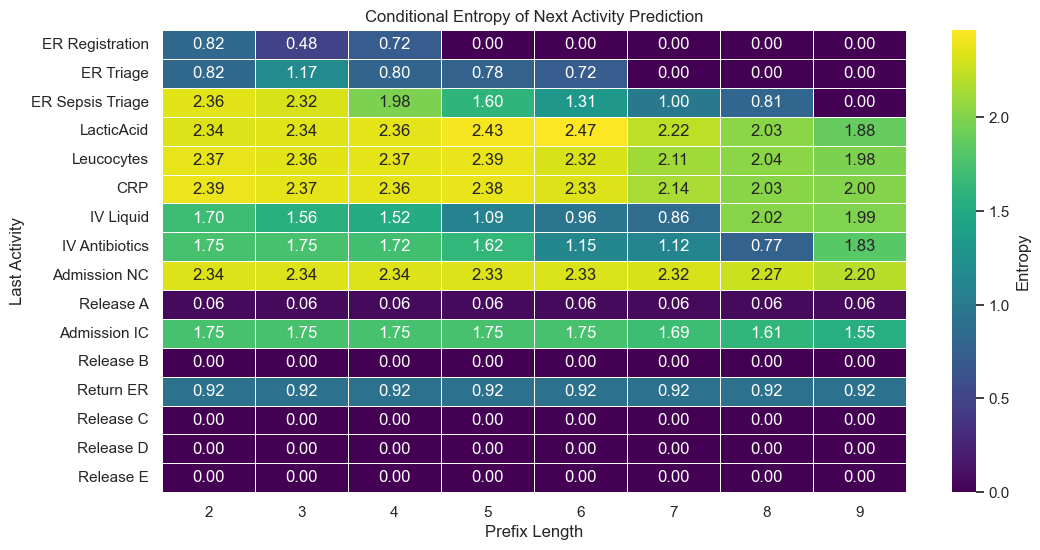

In [189]:
plot_conditional_entropy_table(
    conditional_entropy,
    suffix_length_list=list(range(2, 10)),
)

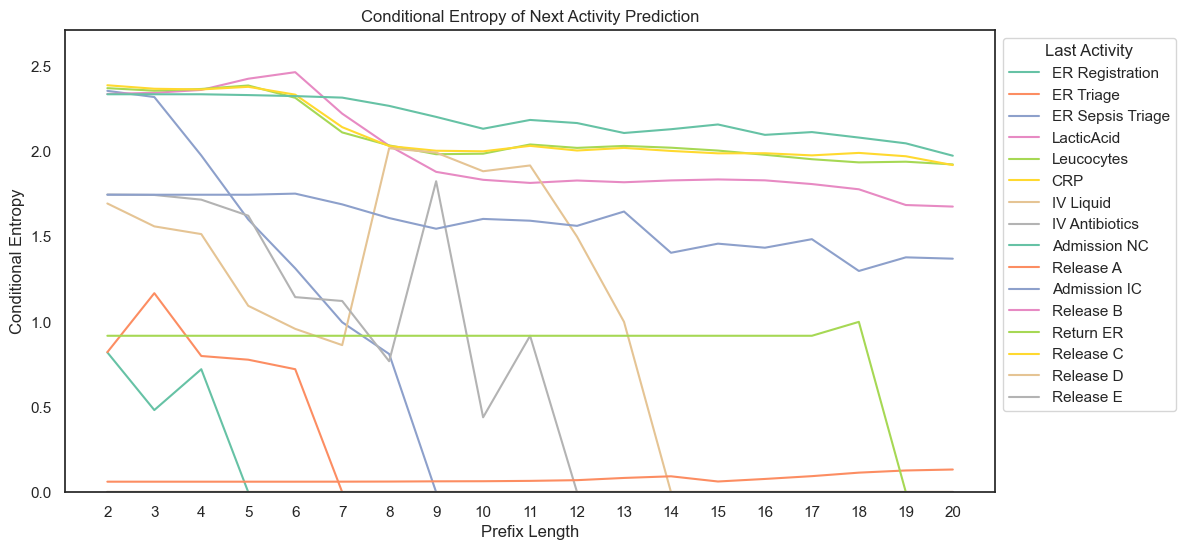

In [190]:
plot_conditional_entropy_curves(conditional_entropy, suffix_length_list=list(range(2, 21)))

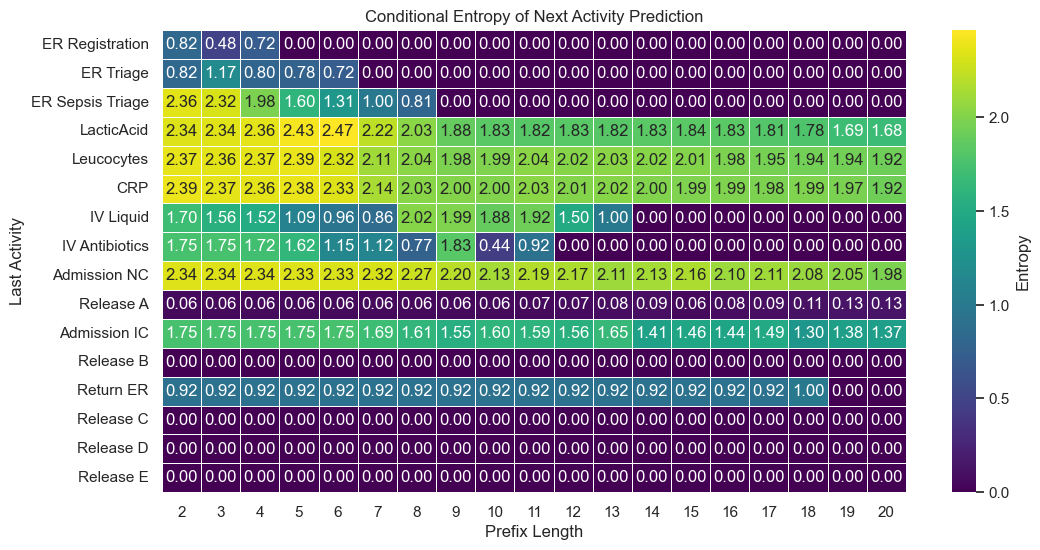

In [191]:
conditional_entropy = compute_conditional_entropy(conditional_dist)
plot_conditional_entropy_table(conditional_entropy, suffix_length_list=list(range(2, 21)))

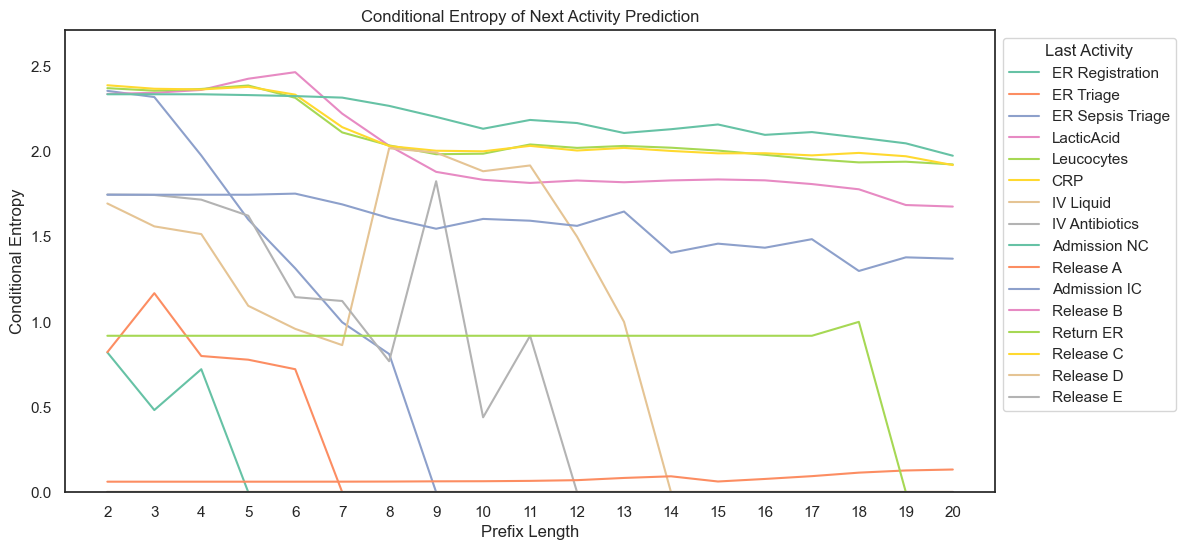

In [192]:
plot_conditional_entropy_curves(conditional_entropy, suffix_length_list=list(range(2, 21)))

For a given activity $A$: when the entropy increases (respectively decreases heavily) between prefix lengths $\ell$ and $\ell+1$, it is due to a big population of **entropy-decreasing** (respectively **entropy-increasing**) occurencies of $A$ at position $\ell$, that is taken in account for prefixes of length $\le \ell$ but cannot be for length $\ell+1$. We can see this alteration of the distribution in the color shift of the distributions depending on prefix length.

This highlights the fact that the evolution of the entropy depends essentially on the positional distribution of the activities in the sequence.

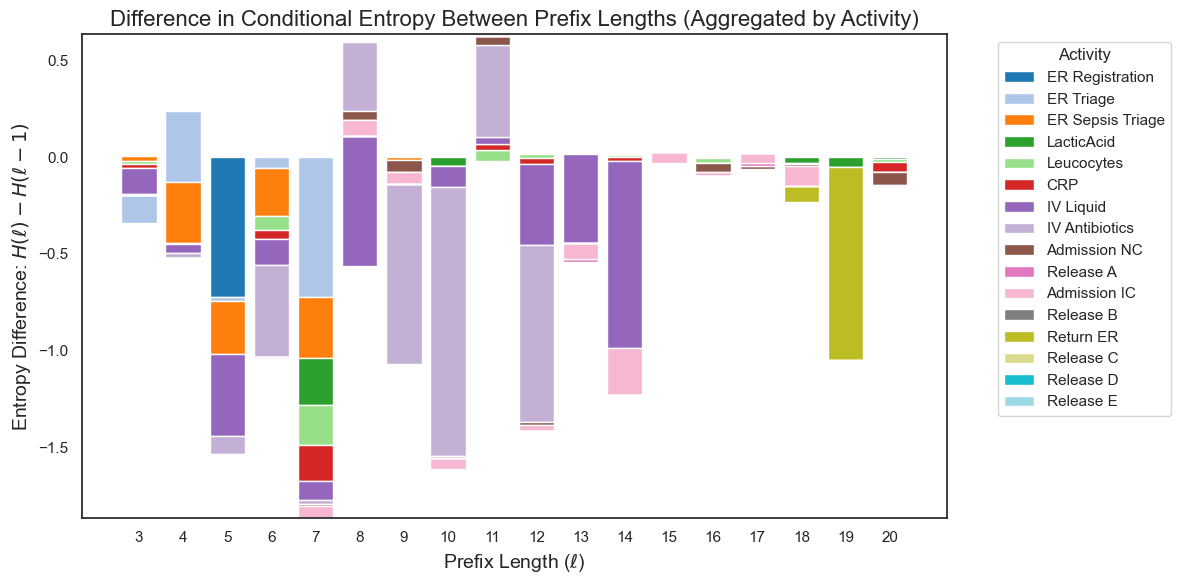

In [193]:
plot_entropy_difference_aggregated(conditional_entropy, range(2, 21))

In [194]:
def compute_weighted_entropy_diff(conditional_counts, conditional_dist, suffix_length_list, normalize="per_bin"):
    """Compute the weighted entropy using counts for each prefix length."""
    acceptable_normalizations = ["per_bin", "max_entropy"]
    if normalize not in acceptable_normalizations:
        raise ValueError(f"Normalization method must be one of: {acceptable_normalizations}")
    weighted_entropy_diff = {}
    for activity in ACTIVITY_LIST:
        for l in suffix_length_list[:-1]:
            # Get the counts for length l and l+1
            count_l = conditional_counts.get((activity, l), 0)
            count_l1 = conditional_counts.get((activity, l + 1), 0)

            # Calculate the total count for the prefix length l
            total_count_l = sum(count_l.values())
            total_count_l1 = sum(count_l1.values())
            total_l_l1 = total_count_l + total_count_l1

            # Get the probabilities
            probs_l = conditional_dist.get((activity, l), {})
            probs_l1 = conditional_dist.get((activity, l + 1), {})

            # Compute entropy for l and l+1
            entropy_l = -sum(p * np.log2(p) if p > 0 else 0 for p in probs_l.values())
            entropy_l1 = -sum(p * np.log2(p) if p > 0 else 0 for p in probs_l1.values())

            # Store the weighted entropy
            if normalize == "per_bin":
                ponderated_entropy_l = entropy_l * total_count_l / total_l_l1 if total_count_l > 0 else 0
                ponderated_entropy_l1 = entropy_l1 * total_count_l1 / total_l_l1 if total_count_l1 > 0 else 0

            elif normalize == "max_entropy":
                ponderated_entropy_l = entropy_l * np.log2(total_count_l) if total_count_l > 1 else 0
                ponderated_entropy_l1 = entropy_l1 * np.log2(total_count_l1) if total_count_l1 > 1 else 0

            else:
                return None

            weighted_entropy_diff[(activity, l)] = ponderated_entropy_l1 - ponderated_entropy_l

    return weighted_entropy_diff


def plot_entropy_difference_aggregated_with_counts(weighted_entropy_diff, suffix_length_list):
    """Plot a bar per length l, split by activities showing the weighted difference in entropy between lengths l and l+1, with a trend line.
    When contributions are mixed (both positive & negative), positive bars are drawn slightly to the left, and negative bars slightly to the right.
    Additionally, an outline bar shows the total entropy difference per suffix length.
    """
    missing_suffix_lengths = [
        length
        for length in suffix_length_list
        if length > 2 and not any((activity, length - 1) in weighted_entropy_diff for activity in ACTIVITY_LIST)
    ]
    if missing_suffix_lengths:
        raise ValueError(f"The following suffix lengths are missing in the data: {missing_suffix_lengths}")

    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.4  # Half-width bars for clarity
    index = np.arange(len(suffix_length_list) - 1)

    activity_colors = plt.get_cmap("tab20", len(ACTIVITY_LIST)).colors
    all_differences = {activity: [] for activity in ACTIVITY_LIST}

    # Calculate differences for each activity and store total differences
    total_differences = np.zeros(len(index))

    for activity in ACTIVITY_LIST:
        differences = [weighted_entropy_diff.get((activity, l), 0) for l in suffix_length_list[:-1]]
        all_differences[activity] = differences
        total_differences += np.array(differences)

    # Initialize bottom stacks for positive and negative contributions
    bottom_positive = np.zeros(len(index))
    bottom_negative = np.zeros(len(index))

    for i, activity in enumerate(ACTIVITY_LIST):
        differences = np.array(all_differences[activity])

        # Separate positive and negative contributions
        positive_contributions = np.where(differences >= 0, differences, 0)
        negative_contributions = np.where(differences < 0, differences, 0)

        # Plot positive contributions slightly left
        ax.bar(
            index - bar_width / 2,
            positive_contributions,
            bar_width,
            bottom=bottom_positive,
            color=activity_colors[i],
            label=f"{activity}",
        )
        bottom_positive += positive_contributions  # Stack positives

        # Plot negative contributions slightly right
        ax.bar(
            index + bar_width / 2, negative_contributions, bar_width, bottom=bottom_negative, color=activity_colors[i]
        )
        bottom_negative += negative_contributions  # Stack negatives

    # Outline-only bar for total difference at each suffix length
    ax.bar(
        index, total_differences, bar_width * 2, fill=False, edgecolor="black", linewidth=1.5, label="Total (Outline)"
    )

    # Add trend line for total difference
    ax.plot(
        index,
        total_differences,
        marker="o",
        color="gray",
        linestyle="--",
        linewidth=1,
        markersize=6,
        label="Total Difference (Curve)",
    )

    # Customize the plot
    ax.set_xlabel(r"Prefix Length ($\ell$)", fontsize=14)
    ax.set_ylabel(r"Weighted Entropy Difference: $H(\ell) - H(\ell-1)$", fontsize=14)
    ax.set_title("Weighted Difference in Conditional Entropy Between Prefix Lengths", fontsize=16)

    ax.set_xticks(index)
    ax.set_xticklabels(suffix_length_list[1:])

    ax.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

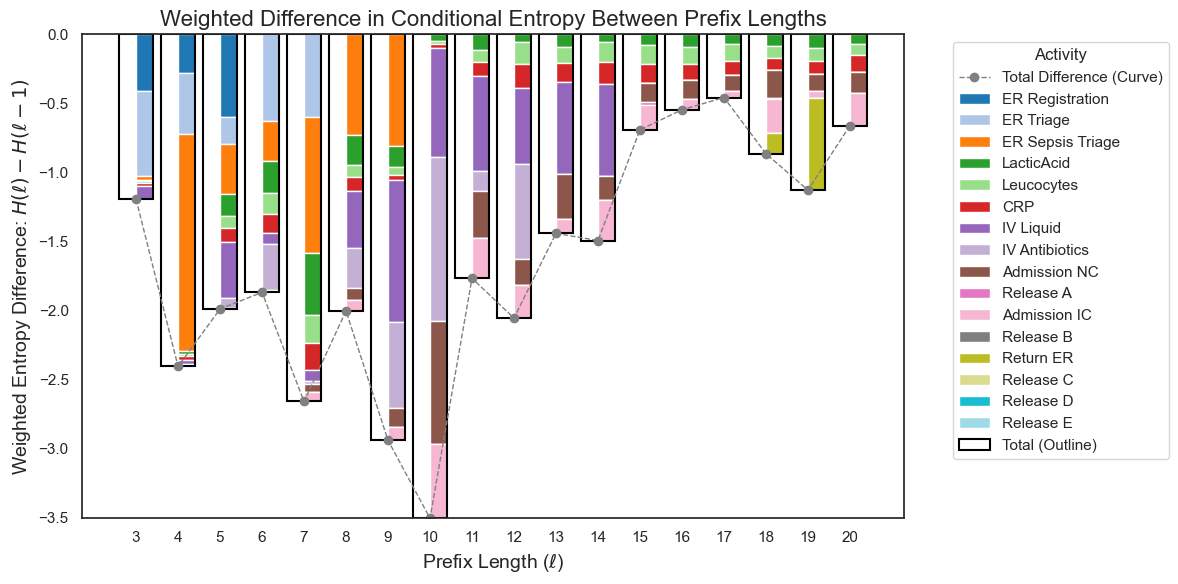

In [195]:
weighted_entropy = compute_weighted_entropy_diff(conditional_counts, conditional_dist, range(2, 21))
plot_entropy_difference_aggregated_with_counts(weighted_entropy, range(2, 21))

In [196]:
def total_entropy_difference(weighted_entropy, suffix_length_list):
    """Compute the total difference in entropy between lengths l and l+1, for l in 'suffix_length_list'."""
    total_differences = {
        l + 1: sum(
            weighted_entropy.get((activity, l + 1), 0) - weighted_entropy.get((activity, l), 0)
            for activity in ACTIVITY_LIST
        )
        for l in suffix_length_list[:-1]
    }
    return total_differences


def select_best_ngrams(total_entropy_difference, ensemble_capacity):
    """Select the best n-grams based on the total entropy difference criteria."""
    selected_lengths = []

    # Iterate through suffix lengths in increasing order
    sorted_lengths = sorted(total_entropy_difference.keys())  # Ensure sorted order

    for l in sorted_lengths:
        if total_entropy_difference[l] < 0:  # Ensure negative difference
            if not selected_lengths or total_entropy_difference[l] < total_entropy_difference[selected_lengths[-1]]:
                selected_lengths.append(l)
            if len(selected_lengths) == ensemble_capacity:
                break  # Stop once we have enough lengths

    if len(selected_lengths) < ensemble_capacity:
        # Select the remaining lengths based on the highest decrease in the difference
        remaining_lengths = [l for l in sorted_lengths if l not in selected_lengths and l != sorted_lengths[0]]
        remaining_lengths.sort(key=lambda l: total_entropy_difference[l] - total_entropy_difference[l - 1])
        selected_lengths.extend(remaining_lengths[: ensemble_capacity - len(selected_lengths)])

    return selected_lengths

In [197]:
# Select the best n-gram lengths based on the total entropy difference
ensemble_capacity = 3
total_entropy_difference = total_entropy_difference(weighted_entropy, range(2, 21))
best_ngrams = select_best_ngrams(total_entropy_difference, ensemble_capacity)
print("Selected n-grams:", best_ngrams)

Selected n-grams: [3, 11, 8]


In [198]:
result_dict = {"sequence": [], "length": [], "frequency": []}

# Prepare column names dynamically
for i in range(2, max_seq_length + 1):
    result_dict[f"{i}-suffix"] = []

# Compute suffix frequencies
for sequence in unique_subsequences:
    if len(sequence) == 1:
        continue
    result_dict["sequence"].append(sequence)
    result_dict["length"].append(len(sequence))
    result_dict["frequency"].append(subsequence_counts[sequence])

    for length in range(2, len(sequence) + 1):
        suffix = tuple(sequence[-length:])  # Get suffix of desired length
        freq = subsequence_counts.get(suffix, 0)  # Get frequency from dataset
        result_dict[f"{length}-suffix"].append(freq)

    for length in range(len(sequence) + 1, max_seq_length + 1):
        result_dict[f"{length}-suffix"].append(0)


# Convert dictionary to DataFrame
df_suffix_frequencies = pd.DataFrame(result_dict)

# Display DataFrame
df_suffix_frequencies.head()

,sequence,length,frequency,2-suffix,3-suffix,4-suffix,5-suffix,6-suffix,7-suffix,8-suffix,...,176-suffix,177-suffix,178-suffix,179-suffix,180-suffix,181-suffix,182-suffix,183-suffix,184-suffix,185-suffix
0,"(IV Liquid, CRP, Leucocytes, LacticAcid, IV An...",158,1,1608,475,248,112,24,17,4,...,0,0,0,0,0,0,0,0,0,0
1,"(LacticAcid, Leucocytes, CRP, CRP, LacticAcid,...",122,1,430,252,93,61,16,14,2,...,0,0,0,0,0,0,0,0,0,0
2,"(CRP, LacticAcid, Leucocytes, Admission IC, La...",11,1,1608,300,35,15,13,7,2,...,0,0,0,0,0,0,0,0,0,0
3,"(Leucocytes, LacticAcid, Admission IC, CRP, La...",115,1,1608,475,88,9,8,1,1,...,0,0,0,0,0,0,0,0,0,0
4,"(LacticAcid, Leucocytes, CRP, LacticAcid, Lact...",22,1,1620,489,255,63,12,4,4,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# Compute the number of unique subsequences for each length
unique_subseq_count_by_length = Counter(subsequence_lengths)

# Normalize suffix frequencies
for length in range(2, max_seq_length + 1):
    col_name = f"{length}-suffix"
    df_suffix_frequencies[col_name] = df_suffix_frequencies[col_name] / unique_subseq_count_by_length[length]

# Display DataFrame
df_suffix_frequencies.head()

,sequence,length,frequency,2-suffix,3-suffix,4-suffix,5-suffix,6-suffix,7-suffix,8-suffix,...,176-suffix,177-suffix,178-suffix,179-suffix,180-suffix,181-suffix,182-suffix,183-suffix,184-suffix,185-suffix
0,"(IV Liquid, CRP, Leucocytes, LacticAcid, IV An...",158,1,14.105263,1.202532,0.265525,0.063636,0.008584,0.004496,0.000877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(LacticAcid, Leucocytes, CRP, CRP, LacticAcid,...",122,1,3.771930,0.637975,0.099572,0.034659,0.005722,0.003703,0.000439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(CRP, LacticAcid, Leucocytes, Admission IC, La...",11,1,14.105263,0.759494,0.037473,0.008523,0.004649,0.001851,0.000439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(Leucocytes, LacticAcid, Admission IC, CRP, La...",115,1,14.105263,1.202532,0.094218,0.005114,0.002861,0.000264,0.000219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(LacticAcid, Leucocytes, CRP, LacticAcid, Lact...",22,1,14.210526,1.237975,0.273019,0.035795,0.004292,0.001058,0.000877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
# Group sequences by length
length_groups = df_suffix_frequencies.groupby("length")

# Compute statistics for suffix distributions
suffix_distribution = {}

for length, group in length_groups:
    suffix_distribution[length] = {}

    for suffix_length in range(2, length + 1):
        col_name = f"{suffix_length}-suffix"
        suffix_freqs = group[col_name].values

        # Compute statistics
        suffix_distribution[length][col_name] = {
            "mean": np.mean(suffix_freqs),
            "std": np.std(suffix_freqs),
            "min": np.min(suffix_freqs),
            "max": np.max(suffix_freqs),
            "median": np.median(suffix_freqs),
            "percentile_25": np.percentile(suffix_freqs, 25),
            "percentile_75": np.percentile(suffix_freqs, 75),
        }

# Convert to DataFrame
df_suffix_distribution = pd.DataFrame.from_dict(suffix_distribution, orient="index")

# Display result
df_suffix_distribution.head()

,2-suffix,3-suffix,4-suffix,5-suffix,6-suffix,7-suffix,8-suffix,9-suffix,10-suffix,11-suffix,...,176-suffix,177-suffix,178-suffix,179-suffix,180-suffix,181-suffix,182-suffix,183-suffix,184-suffix,185-suffix
2,"{'mean': 1.0881040320098494, 'std': 2.32240891...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'mean': 2.239928936264713, 'std': 3.458585573...","{'mean': 0.08390962986700849, 'std': 0.1985859...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'mean': 3.3354558773808183, 'std': 4.18600884...","{'mean': 0.17310600927005124, 'std': 0.2879044...","{'mean': 0.013805143771579492, 'std': 0.029374...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'mean': 4.040525318979266, 'std': 4.586676115...","{'mean': 0.2528998849252014, 'std': 0.31986838...","{'mean': 0.024718342417753555, 'std': 0.039970...","{'mean': 0.003560498450413223, 'std': 0.007275...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{'mean': 4.717224481088271, 'std': 4.869662690...","{'mean': 0.3229613733905579, 'std': 0.35082255...","{'mean': 0.03533535212432567, 'std': 0.0491070...","{'mean': 0.005853939068799584, 'std': 0.009440...","{'mean': 0.0012812090028469037, 'std': 0.00251...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


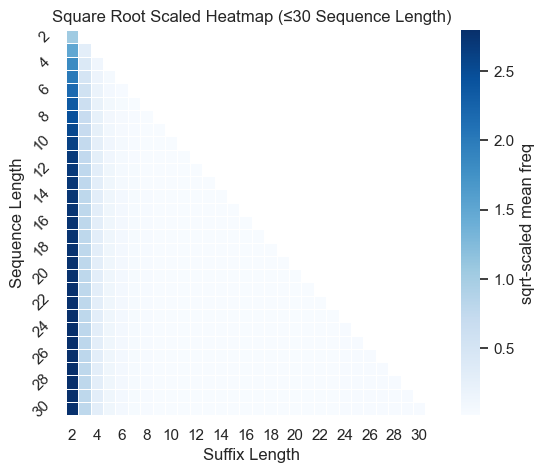

In [201]:
# Convert dictionary to DataFrame
df_suffix_distribution = pd.DataFrame.from_dict(suffix_distribution, orient="index")

# Extract mean values for heatmap
heatmap_data = df_suffix_distribution.map(lambda x: x["mean"] if isinstance(x, dict) else np.nan)

# Rename columns for better visualization
heatmap_data.columns = [col.replace("-suffix", "") for col in heatmap_data.columns]

# Extract only rows where sequence length ≤ 30
heatmap_small = heatmap_data.loc[heatmap_data.index <= 30, heatmap_data.columns[:30]]

# Apply square root transformation to enhance small differences
heatmap_small = np.sqrt(heatmap_small)

# Plot smaller heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(heatmap_small, cmap="Blues", linewidths=0.5, cbar_kws={"label": "sqrt-scaled mean freq"})

# Rotate Y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Labels and title
plt.xlabel("Suffix Length")
plt.ylabel("Sequence Length")
plt.title("Square Root Scaled Heatmap (≤30 Sequence Length)")

plt.show()

In [202]:
# # Count the frequency of each subsequence
# counter = Counter(unique_subsequences)
# print(f"Total number of unique subsequences: {len(counter)}")

# # Now let's filter subsequences by length > 1, > 2, > 3
# subsequences_by_length = {i: [] for i in range(1, 6)}  # For lengths 1, 2, 3, 4, 5

# # Populate the subsequences_by_length dictionary
# for subseq, freq in counter.items():
#     if len(subseq) <= 5:  # We are interested in subsequences up to length 5
#         subsequences_by_length[len(subseq)].append((subseq, freq))

# # Function to plot the frequency distribution of the top N subsequences
# def plot_subsequence_distribution(length, subsequences_by_length):
#     subsequences_by_length_sorted = sorted(subsequences_by_length[length], key=lambda x: x[1], reverse=True)
#     top_subsequences = subsequences_by_length_sorted[:50]

#     subsequences, frequencies = zip(*top_subsequences)
#     subsequences = ['-'.join(seq) for seq in subsequences]  # Convert subsequences to string for plotting

#     plt.figure(figsize=(12, 6))
#     plt.barh(subsequences, frequencies, color='skyblue')
#     plt.xlabel('Frequency')
#     plt.ylabel('Subsequences')
#     plt.title(f"Top 50 Most Frequent Subsequences of Length {length}")
#     plt.gca().invert_yaxis()  # To display the top subsequences at the top
#     plt.tight_layout()  # Adjust layout for better spacing
#     plt.show()

# # Plot subsequence distributions for length 1, >1, >2, >3
# for length in range(1, 6):
#     plot_subsequence_distribution(length, subsequences_by_length)

# # Box and whisker plot of sequence lengths > 1, > 2, > 3 with log scale on Y-axis
# sequence_lengths_by_filter = {i: [] for i in range(1, 6)}

# # Collect sequence lengths greater than 1, 2, 3
# for seq in grouped:
#     for length in range(1, 6):
#         if len(seq) >= length:
#             sequence_lengths_by_filter[length].append(len(seq))

# plt.figure(figsize=(12, 6))
# plt.boxplot([sequence_lengths_by_filter[length] for length in range(1, 6)],
#             labels=[f'Length $\geq$ {length}' for length in range(1, 6)])
# plt.yscale('log')  # Set the Y-axis to log scale
# plt.title("Box and Whisker Plot of Sequence Lengths (Log Scale)")
# plt.ylabel('Sequence Length (Log Scale)')
# plt.show()

# # Plotting activity frequency distribution by subsequence length (1, 2, 3, 4, 5)
# activity_frequencies_by_length = {i: Counter() for i in range(1, 6)}

# # Count activities in subsequences of length 1, 2, 3, 4, 5
# for subseq, freq in counter.items():
#     for length in range(1, 6):
#         if len(subseq) == length:
#             for activity in subseq:
#                 activity_frequencies_by_length[length][activity] += freq

# # Plotting the activity distributions
# plt.figure(figsize=(12, 6))
# for length in range(1, 6):
#     activities, activity_frequencies = zip(*activity_frequencies_by_length[length].items())
#     plt.plot(activities, activity_frequencies, label=f"Length {length}", marker='o')

# plt.title("Activity Frequency Distribution by Subsequence Length (1 to 5)")
# plt.xlabel('Activity')
# plt.ylabel('Frequency')
# plt.legend(title='Subsequence Length')
# plt.xticks(rotation=45)
# plt.show()
